In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Handwritten Digit Recognition using KNN on MNIST Dataset

Loading MNIST dataset (this may take a few minutes the first time)...
Dataset shape: (70000, 784)
Number of samples: 70000, Number of classes: 10


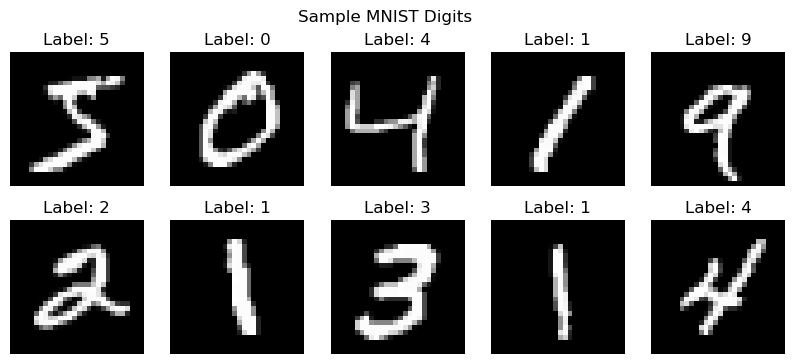

In [2]:
# Load MNIST dataset
print("Loading MNIST dataset (this may take a few minutes the first time)...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

print(f"Dataset shape: {X.shape}")
print(f"Number of samples: {len(X)}, Number of classes: {len(np.unique(y))}")

# Display a few example digits
fig, ax = plt.subplots(2, 5, figsize=(10, 4))
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i].reshape(28, 28), cmap='gray')
    axi.set_title(f"Label: {y[i]}")
    axi.axis('off')
plt.suptitle("Sample MNIST Digits")
plt.show()

In [3]:
#Split data into train/test
# We'll use a subset for speed — full MNIST can be slow for KNN
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Optionally, subsample training data for faster demo
n_train = 10000  # try 10000 out of 60,000 to make it run fast
X_train_small = X_train[:n_train]
y_train_small = y_train[:n_train]

print(f"Number of training samples: {len(X_train_small)}")
print(f"Number of testing samples: {len(X_test)}")

Number of training samples: 10000
Number of testing samples: 14000


In [ ]:
# Train KNN classifier
# Note that KNN does no really "train"; it just stores the dataset.
# To classify a new sample, it compares it to all stored training points.
# A new data point is classified based on the majority label of its closest points in the training set.
#
k = 5  # number of nearest neighbors
print(f"Training KNN classifier with k={k}...")
knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
knn.fit(X_train_small, y_train_small)

# Test and evaluate
print("Evaluating on test set...")
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training KNN classifier with k=5...
Evaluating on test set...

Accuracy: 0.9454

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1381
           1       0.91      0.99      0.95      1575
           2       0.98      0.91      0.95      1398
           3       0.94      0.95      0.94      1428
           4       0.97      0.94      0.95      1365
           5       0.94      0.92      0.93      1263
           6       0.96      0.98      0.97      1375
           7       0.94      0.95      0.95      1459
           8       0.98      0.88      0.93      1365
           9       0.90      0.93      0.92      1391

    accuracy                           0.95     14000
   macro avg       0.95      0.94      0.95     14000
weighted avg       0.95      0.95      0.95     14000



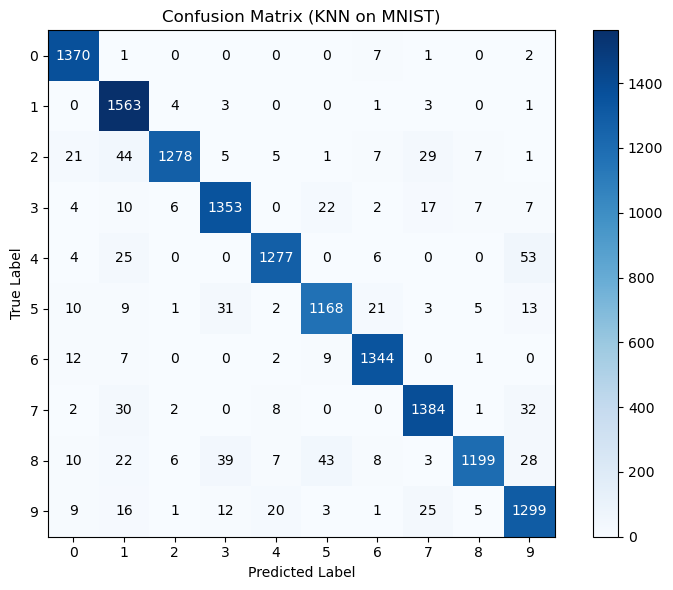

In [5]:
# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix (KNN on MNIST)")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Annotate numbers inside the matrix
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i, format(cm[i, j], "d"),
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black"
        )
plt.tight_layout()
plt.show()


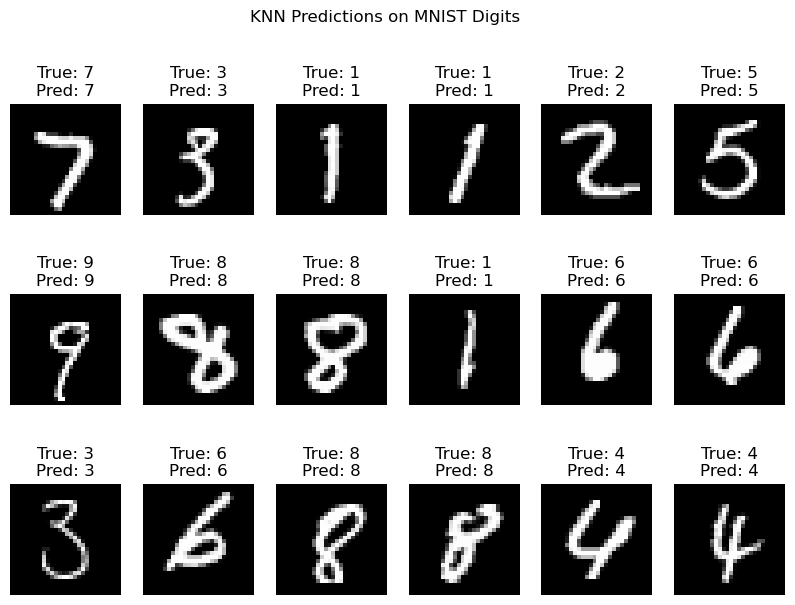

In [6]:
# Visualize some predictions
fig, ax = plt.subplots(3, 6, figsize=(10, 7))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(28, 28), cmap='gray')
    axi.set_title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
    axi.axis('off')
plt.suptitle("KNN Predictions on MNIST Digits")
plt.show()